Key components to be fulfilled :

# 1. Loading and Preprocessing 
Load the Iris dataset from sklearn.
Drop the species column since this is a clustering problem.

In [475]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [476]:
from sklearn import datasets
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [477]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [478]:
data.shape

(150, 4)

In [479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [480]:
null_values=data.isnull().sum()
print("The null values in each column:\n",null_values)

The null values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [481]:
data.duplicated().sum()

1

In [482]:
data=data.drop_duplicates()

In [483]:
data.duplicated().sum()

0

There is only one duplicate value, removed using drop function.

# 2.Clustering Algorithm Implementation 
Implement the following two clustering algorithms:

# A) KMeans Clustering 
-- Provide a brief description of how KMeans clustering works.
-- Explain why KMeans clustering might be suitable for the Iris dataset.
-- Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.

#KMeans Clustering 
KMeans is an unsupervised machine learning algorithm designed for clustering, which involves partitioning data into distinct groups. 
The process begins with the random initialization of k centroids. Each data point is then assigned to the nearest centroid based on Euclidean distance. 
The centroids are subsequently updated by calculating the mean position of all points within each cluster. 
This iterative process continues until the centroids stabilize, meaning they no longer change significantly, or a predefined stopping condition is met.

The Iris dataset naturally forms three distinct clusters that correspond to the three species: Setosa, Versicolor, and Virginica. 
KMeans clustering is particularly effective for this dataset because it performs well when clusters are well-separated in the feature space. 
With only four numerical features, the dataset provides a suitable structure for KMeans to efficiently identify patterns and group similar data points into meaningful clusters.


In [488]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(data)

In [489]:
# Elbow Method to Determine Optimal Number of Clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

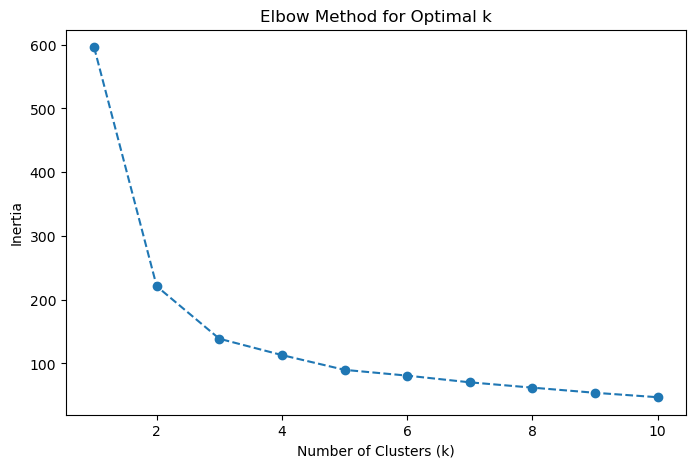

In [490]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [491]:
# Choose Optimal Number of Clusters 
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

In [492]:
cluster_labels=kmeans.fit_predict(scaled_features)

In [493]:
data["Cluster"]=kmeans.labels_
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

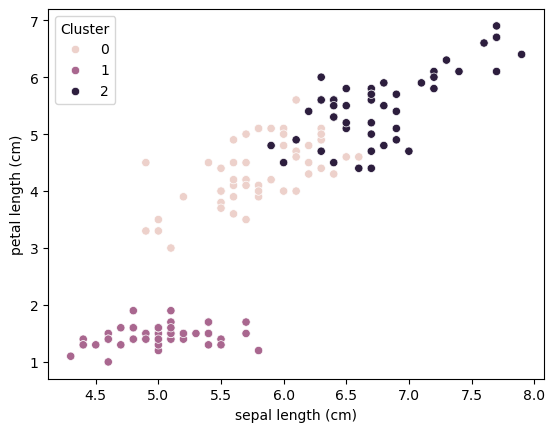

In [494]:
sns.scatterplot(data=data,x="sepal length (cm)",y="petal length (cm)",hue="Cluster")

In [495]:
data["Cluster"].unique()

array([1, 2, 0])

In [496]:
# Evaluate Model Performance
# 1. Silhouette Score
sil_score = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

# 2. Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_features, cluster_labels)
print(f"Davies-Bouldin Index: {db_score:.2f}")

from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_features, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

Silhouette Score: 0.46
Davies-Bouldin Index: 0.83
Calinski-Harabasz Index: 240.53


# B) Hierarchical Clustering 
-- Provide a brief description of how Hierarchical clustering works.
-- Explain why Hierarchical clustering might be suitable for the Iris dataset.
-- Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.

#Hierarchical clustering
Hierarchical clustering is an unsupervised machine learning technique that groups data points into a hierarchy of clusters. 
It operates in two ways: agglomerative (bottom-up) and divisive (top-down). 
The agglomerative approach, which is more commonly used, begins by treating each data point as its own cluster and then progressively merging the closest clusters based on a similarity measure, such as Euclidean distance. 
This process continues until all points are merged into a single cluster or a stopping criterion is met. 
In contrast, the divisive approach starts with all data points in a single cluster and recursively splits them into smaller groups. 
The results of hierarchical clustering are typically represented using a dendrogram, a tree-like diagram that visually illustrates how clusters are formed and their relationships.


Hierarchical clustering is suitable for the Iris dataset as it can reveal natural relationships between its three species based on feature similarities. 
Unlike K-Means, it does not require a predefined number of clusters and provides an intuitive visualization through a dendrogram. 
While hierarchical clustering is computationally expensive for large datasets, the small size of the Iris dataset makes it efficient and interpretable, aiding in understanding species groupings.
 

In [500]:
clusters=AgglomerativeClustering(n_clusters=3)
hierarchical_labels=clusters.fit_predict(scaled_features)

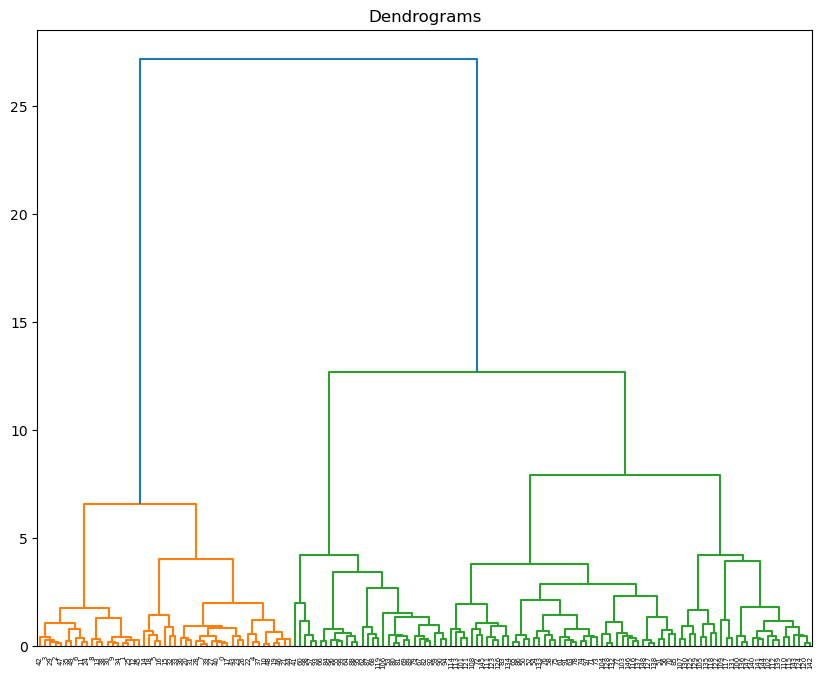

In [501]:
# Plotting a Dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage (scaled_features, method='ward'))

In [502]:
clusters=AgglomerativeClustering()
clusters.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [503]:
data['cluster2']=clusters.fit_predict(data)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,cluster2
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [504]:
data["cluster2"].unique()

array([1, 0], dtype=int64)

In [505]:
uniquecolor=set(dend['color_list'])
uniquecolor

{'C0', 'C1', 'C2'}

In [506]:
optimal_number_of_clusters=len(uniquecolor)-1
optimal_number_of_clusters

2

In [535]:
# Evaluate Model Performance
#1.silhouette_score
sil_score=silhouette_score(scaled_features,hierarchical_labels)
print(f"silhouette_score:{sil_score:.2f}")

#2.Davies-Bouldin Index
db_score=davies_bouldin_score(scaled_features,hierarchical_labels)
print(f"Davies-Bouldin Index:{db_score:.2f}")

#3.Calinski-Harabasz Index
ch_score=calinski_harabasz_score(scaled_features,hierarchical_labels)
print(f"Calinski-Harabasz Index:{ch_score:.2f}")

silhouette_score:0.45
Davies-Bouldin Index:0.80
Calinski-Harabasz Index:222.83


--The End--